In [2]:

import torch
import numpy as np
from jedi.inference.recursion import total_function_execution_limit

In [4]:
a=torch.tensor([[1,2,3],[2,4,6]])
print(torch.max(a,1))

torch.return_types.max(
values=tensor([3, 6]),
indices=tensor([2, 2]))


In [16]:
ts1=torch.randn(3,4)
ts2=torch.tensor([[1,2,3],[4,5,6]])
ts3=torch.randint(3,10,(3,4))
print(ts1)
print(ts2)
print(ts3)

tensor([[ 0.4774,  0.4419,  1.1372, -0.5860],
        [ 0.2453,  2.7953, -1.7486,  0.5264],
        [-1.0767, -0.2755, -1.5215, -0.7193]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[7, 4, 4, 6],
        [7, 7, 9, 5],
        [6, 7, 8, 6]])


In [17]:
ts1_=ts1.to('cuda:0')

In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
##展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [20]:
##生成数据集
x1=torch.rand(1000,1)
x2=torch.rand(1000,1)
x3=torch.rand(1000,1)
x4=torch.rand(10,1)
x5=torch.rand(10,1)

In [21]:
y1=((x1+x2+x3)<1).float()
y2=((1<(x1+x2+x3))&((x1+x2+x3)<2)).float()
y3=((x1+x2+x3)>2).float()
print(y1.shape)

torch.Size([1000, 1])


In [22]:
data=torch.cat((x1,x2,x3,y1,y2,y3),axis=1)
data=data.to('cuda:0')
print(data)

tensor([[0.6445, 0.7854, 0.1416, 0.0000, 1.0000, 0.0000],
        [0.6743, 0.7405, 0.4578, 0.0000, 1.0000, 0.0000],
        [0.0643, 0.4354, 0.2286, 1.0000, 0.0000, 0.0000],
        ...,
        [0.8124, 0.1970, 0.4477, 0.0000, 1.0000, 0.0000],
        [0.0321, 0.7382, 0.7198, 0.0000, 1.0000, 0.0000],
        [0.3422, 0.7190, 0.2314, 0.0000, 1.0000, 0.0000]], device='cuda:0')


 x = torch.randn(2, 3)
>>> x
tensor([[ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497]])
>>> torch.cat((x, x, x), 0)
tensor([[ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497],
        [ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497],
        [ 0.6580, -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497]])
>>> torch.cat((x, x, x), 1)
tensor([[ 0.6580, -1.0969, -0.4614,  0.6580, -1.0969, -0.4614,  0.6580,
         -1.0969, -0.4614],
        [-0.1034, -0.5790,  0.1497, -0.1034, -0.5790,  0.1497, -0.1034,
         -0.5790,  0.1497]])

In [23]:
##划分训练集与测试集
train_size=int(len(data)*0.8)
test_size=len(data)-train_size
data=data[torch.randperm(data.size(0)),:]
train_data=data[:train_size,:]
test_data=data[train_size:,:]
print(train_data.shape)

torch.Size([800, 6])


In [24]:
##搭建神经网路
class DNN(nn.Module):
    def __init__(self):
        super(DNN,self).__init__()  ##目的是调用父类的初始化方法,因为一般来讲是self.name=name这种形式
        self.net=nn.Sequential(
            nn.Linear(3,5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,3),
        )
    def forward(self,x):
        return self.net(x)

In [25]:
##神经网络内部参数
for name,param in DNN().named_parameters():
    print(name,param)

net.0.weight Parameter containing:
tensor([[-0.1053,  0.2184, -0.5320],
        [-0.1354, -0.3686,  0.1113],
        [ 0.5696,  0.3901, -0.5227],
        [ 0.5139, -0.4062, -0.2505],
        [ 0.3446, -0.5671, -0.0523]], requires_grad=True)
net.0.bias Parameter containing:
tensor([-0.3218, -0.4638,  0.2133, -0.5365, -0.5547], requires_grad=True)
net.2.weight Parameter containing:
tensor([[-0.2785, -0.0395, -0.1951, -0.2695,  0.0593],
        [-0.2459, -0.1688,  0.2745, -0.0334, -0.2265],
        [ 0.4068, -0.0872,  0.2932, -0.0747,  0.1528],
        [-0.2382,  0.4161,  0.2867, -0.2266, -0.1071],
        [ 0.0892,  0.4319,  0.0476, -0.3122,  0.1383]], requires_grad=True)
net.2.bias Parameter containing:
tensor([ 0.0958, -0.2567, -0.1235,  0.1318, -0.2031], requires_grad=True)
net.4.weight Parameter containing:
tensor([[-0.1092,  0.2075,  0.2380,  0.1680,  0.3663],
        [-0.0369, -0.1398,  0.1131, -0.1195, -0.1036],
        [ 0.2729, -0.4280, -0.0904,  0.4175,  0.1670],
        [-0.14

In [42]:
model=DNN()
model=model.to('cuda:0')
print(model)
loss_fn=nn.MSELoss()
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)




DNN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=3, bias=True)
  )
)


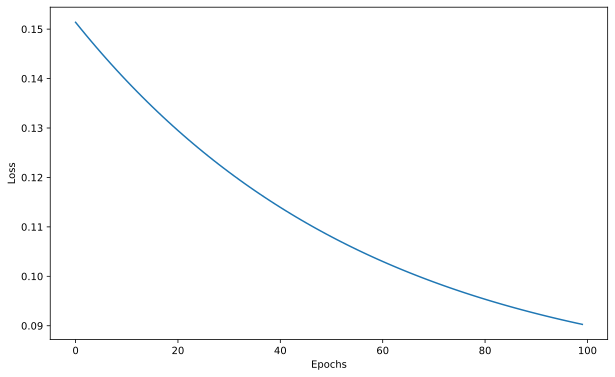

In [44]:
##训练网络
epochs=100
losses=[]

X=train_data[:,:3]
Y=train_data[:,:3]
for epoch in range(epochs):
    pred=model(X)
    loss=loss_fn(pred,Y)
    losses.append(loss.item())
    optimizer.zero_grad() ##清理上一轮留存梯度
    loss.backward()
    optimizer.step()
fig=plt.figure(figsize=(10,6))
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
class Myclass:
    def __init__(self,name,age):
        self.name=name
        self.age=age
    def greet(self):          ##python中需要显式传递self参数来访问当前对象
        print(f"Hello,my name is{self.name} and I am {self.age} years old")
myclass=Myclass("John",20)
print(myclass.greet())

Hello,my name isJohn and I am 20 years old
None


In [45]:
##测试集精度
X=test_data[:,:3]
Y=test_data[:,-3:]
with torch.no_grad():
    pred=model(X)
    pred[:,torch.argmax(pred,axis=1)]=1
    pred[pred!=1]=0
    correct=torch.sum((pred==Y).all(1))
    total=Y.size(0)
    print(f"测试集精准度:{100*correct/total}%")
    

测试集精准度:73.5%


In [39]:
pred=torch.tensor([[0.1,0.7,0.2],
                   [0.3,0.5,0.2],
                   [0.8,0.1,0.1]])
print(torch.argmax(pred,axis=1))
print(pred[:,1])

tensor([1, 1, 0])
tensor([[0.1000],
        [0.3000],
        [0.8000]])


In [32]:
a=torch.randn(3,3)
print(a)
print(torch.argmax(a,dim=1))

tensor([[ 0.2793,  0.5309,  1.8195],
        [ 1.3107, -0.5942, -0.4855],
        [ 0.6481,  0.2838, -1.3752]])
tensor([2, 0, 0])


In [51]:
##保存网络
torch.save(model,'model.pth')
model_data=torch.load('model.pth',weights_only=False)
print(model_data)

DNN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=3, bias=True)
  )
)
